## NLP Application with DL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hepsiburada.zip', encoding="utf-8")

In [ ]:
df.head()

Rating                                             Review
0       1                            3 yıldır tık demedi. :)
1       1                      3 yıldır kullanıyorum müthiş 
2       1  Ürün bugün elime geçti çok fazla inceleme fırs...
3       1  Almaya karar verdim. Hemencecik geldi. Keyifle...
4       1  Günlük kullanımınızı çok çok iyi karsılıyor kı...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
df.Rating = df.Rating.map({1:0, 0:1})

# hedef classımızı 1 yapıyoruz.

In [ ]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [ ]:
df.Rating.value_counts(normalize=True)

0    0.943835
1    0.056165
Name: Rating, dtype: float64

## Tokenization

In [ ]:
X = df['Review']
y = df['Rating']

In [ ]:
num_words = 15001 # 1 fazlasını yazıyoruz. 

tokenizer = Tokenizer(num_words=num_words,) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
# Tokenizer fonksiyonu tüm textleri word tokenlerine ayırır. 
# num_words hyperparametresi tokenlerin numeric versiyona dönüştürülmesi aşamasında sadece corpusta en fazla geçen ilk 15.000 kelime(token)'nin numeric versiyona 
# dönüştürüleceğini diğer tokenlerin ignore edileceğini gösteriyor.
# num_words'e None değeri atanırsa tüm kelimeler/tokenler numeric versiyona dönüştürülür. Ancak num_words'e None atandığında DL modeline data verilirken hata 
# döndürür. Bu sebeple num_words'e herzaman integer sayı atanmalıdır. Model kurma aşamasında detaylarına gireceğiz.

# filters hyper_parametresiyle yapılacak olan temizlik işlemlerini düzenleyebiliyoruz.

In [ ]:
tokenizer.fit_on_texts(X)

# fit_on_texts, önce corpustaki textleri tokenlerine ayırır sonra da tüm unique tokenleri tespit edip kullanım sıklıklarına göre numaralandırır. 
# En sık kullanılan tokene 1 numarası verilir.
# num_words= 15001 tanımladığımız için dönüşüm aşamasında 1 ile 15000 arasındaki numaraları alan tokenler kullanılacak diğerleri ignore edilecek.
# Bu tokenlerin kullanım sıklıklarının sıralamasını görebilmek için aşağıda olduğu gibi word_index fonksiyonunu kullanmamız gerekecek.

## Creating word index

In [ ]:
tokenizer.word_index

# word_index corpustaki tokenleri kullanım sıklıklarına göre sıralar.

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [ ]:
len(tokenizer.word_index)
# corpusumuzda toplam 217983 adet unique token var. 

217983

## Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

# texts_to_sequences fonksiyonu ile datamızın her bir document/satırında bulunan tüm tokenler word_index'teki kullanım sıklıklarını 
# gösteren numaralara göre dönüştürülür (num_words=15001 olduğundan sadece en sık kullanılan ilk 15000 token kullanılacak). 

# örnek: "Bu ürün çok güzel tavsiye ederim" yorumu --> Bu: 5, ürün: 4, çok: 1, güzel: 7, tavsiye: 9, ederim: 10 olacak şekilde [5, 4, 1, 7, 9, 10] vektörüne dönüştürülür.
# Bu dönüşümlerin corpusta en sık geçen ilk 15.000 tokene göre yapıldığını unutmayın. Eğer "ederim" tokeni 15.001 'inci veya daha büyük sayıdaki bir token olsaydı dönüşüm
# esnasında "ederim" tokeni ignore edilecek ve elde ettiğimiz vektör [5, 4, 1, 7, 9] şeklinde olacaktı.

In [ ]:
X[:2]

0          3 yıldır tık demedi. :)
1    3 yıldır kullanıyorum müthiş 
Name: Review, dtype: object

In [ ]:
X_num_tokens[:2]

# ilk iki yorumun numeric vektörlerini görüyoruz.

[[52, 462, 1617, 4510], [52, 462, 55, 584]]

In [ ]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [ ]:
print(X_num_tokens[105])

# 105'inci indexdeki yorum aşağıdaki gibi numeric versiyona dönüştürüldü.

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


## Maximum number of tokens for all documents

In [ ]:
len(X_num_tokens[105])

# 105. yorum 22 tokenden oluşuyor.

22

In [ ]:
len(X_num_tokens[106])

# 106. yorum 22 tokenden oluşuyor.

18

In [ ]:
len(X_num_tokens[6150])

# ML/DL modelleri kendisine verilecek olan tüm datanın aynı boyutlarda olmasını ister. Ancak gördüğünüz gibi tüm yorumların boyutları
# biribirinden farklı.

88

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)


# öncelikle corpustaki tüm yorumların boyutlarını bir liste içine alıp num_tokens değişkenine atıyoruz. 
# Aggrigation fonksiyonlarını pratik bir şekilde arreylere uygulanabildiği için listeyi arreye dönüştürüyoruz.

In [ ]:
num_tokens

# her bir yorumun/documentin kaç tokenden oluştuğunu görüyoruz.

array([ 4,  4, 66, ...,  4, 10, 38])

In [ ]:
num_tokens.mean()

# tüm yorum boyutlarının ortalamsını alıyoruz. 
# Tüm yorumları bu sayıya sabitleyebilir miyiz? Ya da başka sayı mı seçmeliyiz?

21.361105064949466

In [ ]:
num_tokens.max()

# en uzun yorumun 298 tokenden oluştuğunu gördük. 

298

In [ ]:
num_tokens.argmax() 

# listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [ ]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [ ]:
len(X_num_tokens[21941])

# Corpusumuzdaki tüm yorumları aynı boyuta getimemiz gerekir. Yorumlarda bir bilgi kaybı/ token kaybı olmaması için aslında
# tüm yorumları en uzun yorumun uzunluğu olan 298'e sabitlenmesi tavsiye edilir. Ancak bu bize çalışma maaliyeti olarak geri dönecektir.
# çok güçlü makinalarınız varsa tabii ki en uzun yorumun boyutuna göre tüm yorumları sabitlemek en mantıklısıdır.
# Ancak, Makinalarımız kuvvetli değilse daha küçük boyutlarda sabitlememiz gerekiyor. Buna karar verirken corpusumuzdaki
# yorumların %95 ve daha üzeri oranlarda bilgi/token kaybı olmayacak (%5 veya daha az token/bilgi kaybı olacak) şekilde sayıyı belirleyebiliyoruz.

298

In [ ]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) <= 11)
print(sum(np.array(list) <= 11))
print(sum(np.array(list) <= 11)/len(list))

# Örnek: Corpusumuzda 6 adet yorum olduğunu varsayalım. ilk yorum 5, ikinci yorum 10, üçüncü yorum 8, dördüncü yorum 9, beşinci
# yorum 12 ve altıncı yorum 15 tokenden oluşuyor. 

# Tüm yorumları 11 tokene sabitlersem kaç yorumda bilgi/token kaybı olmayacağına bakalım.

# ilk 4 yorumda herhangi bir bilgi/token kaybı olmayacak, ancak 5. yorumda 1 token, 6. yorumda 4 token kaybı olacak.
# np.array(list) <= 11 kodu ile tüm yorumları 11 tokene sabitlediğimizde bilgi/token kaybı olmayan yorumların True olarak, 
# bilgi/token kaybı olanların False olarak döndürülmesini sağlıyorum --> [ True  True  True  True False False] 
# sum(np.array(list) <= 11) kodu ile öncelikle Truelar 1'e, Falselar 0'a dönüştürülür. Sonra da bu değerler toplanır. Çıkan
# sonuç kaç yorumda bilgi/token kaybı olmadığını bize gösterir. 
# [True  True  True  True False False]-->[1 1 1 1 0 0]--> sum([1 1 1 1 0 0])-->4 --> cospusumdaki 6 yorumun 4'ünde bilgi/token
# kaybı yok.
# Elde ettiğimiz 4 sonucunu corpsumuzdaki tüm yorumların sayısına (len([5, 10, 8, 9, 12, 15])-->6) böldüğümüzde bize oran 
# olarak kaç yorumda bilgi/token kaybı olmadığını döndürür (4/6 --> 0.67). Biz bu oranın %95 ve üzeri olmasını istiyoruz.

[ True  True  True  True False False]
4
0.6666666666666666


In [ ]:
max_tokens = 61

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

# yukardaki örneğimizde olduğu gibi aynı denklemi burda da kuruyoruz. ve max_tokens kaç olursa oran %95'in üzerinde olur.
# Manuel olarak bunun kontrolünü sağlıyoruz. 61 tokene sabitlersem corpusumdaki yorumların %96'sında bilgi/token kaybı 
# olmayacağını gördüm. Bu sebeple max_tokens = 61 olarak devam edeceğim.

0.9614451102066965

In [ ]:
sum(num_tokens <= max_tokens)

# max_tokens = 61 iken cospusumdaki toplam 243497 yorumun 234109 tanesinde bilgi/token kaybı olmuyor.

234109

In [ ]:
len(num_tokens)

# datamdaki tüm document/satır/yorumların sayısı

243497

## Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre") # padding="pre", dolgu ve kırpmalar baştan yapılır.
                                                                      # padding="post", dolgu ve kırpmalar sondan yapılır.
                                                                      # ikisi de denenir hangisi iyi sonuçlar veriyorsa onunla devam edilir.

# pad_sequences fonksiyonu içine yorumların numeric versiyonları ve sabitleneceği uzunluk (maxlen) verilerek tüm yorumlar 61 tokene sabitleniyor.
# Bu işleme padding (dolgulama, takviye etme) işlemi denir. Ancak, adı sizi yanıltmasın bu işlemde sadece dolgu işlemi değil, eksiltme/kırpma işlemi de yapılır.
# 61'den daha az tokene sahip yorumlar, yorumun başına ilave edilecek şekilde 0'lar ile doldurulur. Örnek, 50 tokenden oluşan bir yorum 61 tokene sabitlenecek şekilde başına 
# 11 adet 0 ilave edilir. (if padding="pre")
# 61'den daha fazla tokene sahip yorumlar, yorumun başından olacak şekilde tokenleri kırpılır. Örnek, 71 tokenden oluşan bir yorum 61 tokene sabitlenecek şekilde yorumun 
# başındaki ilk 10 token kırpılır.(if padding="pre")
# 61 tokenden oluşan bir yoruma herhangibir ilave etme veya kırpma işlemi yapılmaz. Olduğu gibi bırakılır.
# 61 tokene sabitlediğimiz yorumlarımızı X_pad değişkenine atıyoruz.

In [ ]:
X_pad.shape

# tüm yorumların 61 tokene sabitlendiğini görüyoruz.
# padding işlemine tabi tutulmuş data olduğu anlaşılsın diye X_pad ismini verdik.

(243497, 61)

In [ ]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [ ]:
len(np.array(X_num_tokens[800]))
# 800'üncü yorumun 31 tokenden oluştuğunu görüyoruz.

31

In [ ]:
X_pad[800]

# padding işlemi sonrası 61 tokene sabitlenecek şekilde yorumun başına 30 adet 0 ilave ediliyor.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10], dtype=int32)

In [ ]:
np.array(X_num_tokens[21941])

# şimdide 298 tokenden oluşan corpusun en uzun olan 21941'inci yorumuna padding işlemi uygularsak ne olacağına bakalım.

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [ ]:
X_pad[21941]

# Gördüğünüz gibi 61 tokene sabitlenecek şekilde yorumun başındaki 237 token kırpılıyor.

array([ 872, 3501,  537, 1804,  488, 2218,   75,  163,    2,  456,   13,
       1308, 1865, 3432,    5,  824, 7798,  836, 1640, 7838, 3344,   12,
       1308,   31, 3063,  299, 2704,  851, 1052,   39, 1490, 3436,  317,
       1170,   75,  537,   50,  327,  246, 1322,  120,    2, 3436, 7527,
        199,  260,  579, 6176, 1800,   13,   45,  808,  108,    3,  865,
        749, 5840,   50,  106,   76,  879], dtype=int32)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

## Modelling

In [ ]:
model = Sequential()

# Bu işlev, bir modelin sıralı bir şekilde, yani katmanların (layer) birbirini ardışık olarak takip ettiği bir modeli temsil eder. 
# Sequential modeli, çıktıları bir sonraki katmana giren katmanları içerir. 
# Katmanlar, Sequential modeline add metoduyla eklenir.

In [ ]:
embedding_size = 50

# DL modele vereceğimiz her bir tokenin kaç elemanlı/boyutlu bir vektör olmasını istiyorsak burada belirtiyoruz.
# Best practice genelde 50, 100, 300 gibi rakamlar tercih edilse de siz istediğiniz rakamı seçebilirsiniz. Ancak bu sayı ne kadar büyük olursa bize çalışma maaliyeti olarak
# geri dönecektir.

## ANN Modellerinde Tavsiye edilen Nöron Sayısı

Birden fazla hidden layer bulunan **(ANN)** bir deep learning modelinde nöron sayısını planlamak için birkaç farklı yaklaşım bulunmaktadır.

**Giderek azalan nöron sayısı**: İlk gizli katmanda daha fazla nöron kullanılır ve her sonraki katmanda nöron sayısı azaltılır. Bu yaklaşım, daha önceki katmanlarda daha fazla özellik öğrenilmesini sağlar ve daha sonraki katmanlarda daha az özellik ihtiyacı olduğu düşünülür.

**Sabit nöron sayısı**: Her katmanda aynı sayıda nöron kullanılır. Bu yaklaşım, her katmanın aynı öneme sahip olduğu düşünülür.

**Giderek artan nöron sayısı**: İlk gizli katmanda az sayıda nöron kullanılır ve her sonraki katmanda nöron sayısı arttırılır. Bu yaklaşım, daha sonraki katmanlarda daha fazla özellik ihtiyacı olduğu düşünülür.

Bu yöntemler arasında en iyisini bulmak için deneme-yanılma yapılması önerilir. Ayrıca, gizli katman sayısının, nöron sayılarının, optimizasyon fonksiyonlarının, batch size'ın, vb hiperparametrelerin etkilerini anlamak adına deneyler yaparak, en iyisini seçmek gerekir.

**Hipotez olarak, ilk katmanlarda daha fazla nöron kullanılmasının, daha geniş bir özellik alanını kapsamasına ve dolayısıyla daha iyi bir özellik öğrenmesine neden olabileceği söylenebilir. Ancak performans için her zaman en iyi seçenek olmayabileceği için, yapacağınız deneylerle hepsini deneyip en iyi sonucu elde etmeniz önerilir.**

## RNN Modellerinde Tavsiye edilen Nöron Sayısı:

**Giderek azalan nöron sayısı:** İlk LSTM&GRU katmanında daha fazla nöron kullanılır ve her sonraki katmanda nöron sayısı azaltılır. Bu yaklaşım, daha önceki katmanlarda daha fazla özellik öğrenilmesini sağlar ve daha sonraki katmanlarda daha az özellik ihtiyacı olduğu düşünülür.

İlk katman için tavsiye edilen nöron sayısı modele verdiğimiz word embedding vektörü kaç elemandan oluşuyorsa o sayı kadardır. Eğer word embedding 50 elemandan oluşuyorsa ilk layerdaki nöron sayısı 50 ile başlamalı ve giderek azalmalıdır.

LSTM ve GRU layerlarının "return_sequences" hyper_parametresi True olarak düzenlenirse aşağıda görülen tüm time steplerdeki hidden stateler bir sonraki LSTM/GRU layerına beslenir. Eğer takip eden layer LSTM/GRU değilse "return_sequences" hyper_parametresi False olarak düzenlenir. Böylece sadece son hidden state beslenir.

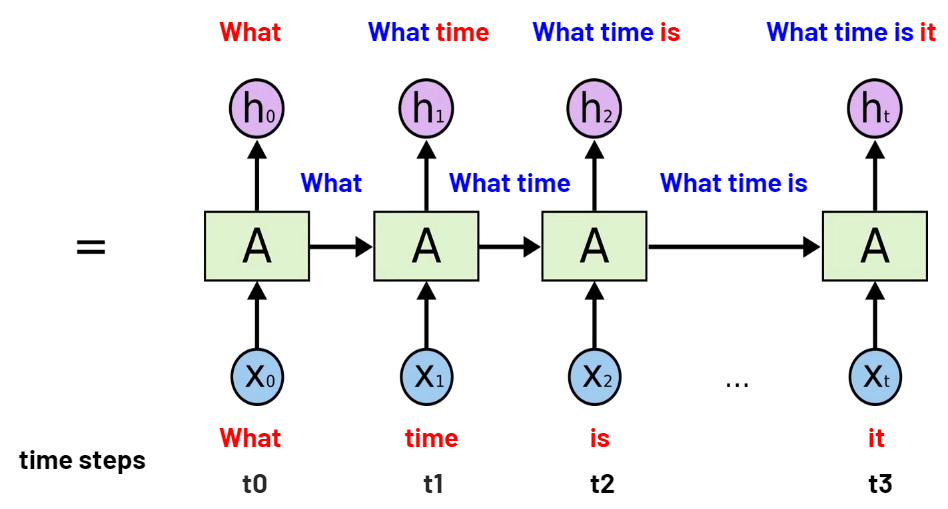

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

# Embedding layer NLP modellerinde kullanılan bir layer olup 3 boyutlu bir tensörden oluşur. 
# 1'inci boyutu train setindeki toplam yorum sayısı.
# 2'inci boyutu her bir yorumun kaç tokenden oluştuğu (max_tokens).
# 3'üncü boyutu her bir tokene ait word embeddingin kaç elemanlı bir vektörden oluştuğu (embedding_size).
# Yorumlar numeric versiona dönüştürülürken corpusta en sık kullanılan ilk 15000 token kullanıldığından, hem train hem de predicit aşamasında sadece corpusta en sık
# geçen ilk 15000 token kullanılsın diye Embedding layera imput_dim = num_words düzenlemesini yapıyoruz.
# Eğer imput_dim'i 15.000'den daha küçük bir sayı yaparsanız (10000 gibi) o zaman model corpusta en sık kullanılan ilk 10000 token ile eğitim ve prediction yapar.

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))

# return_sequences=False modelin sadece son zaman adımındaki (t_n) hidden_state'i bir sonraki layera aktarır. defaultu False'dur.
# return_sequences= True,  modelin tüm zaman adımlarındaki (t_0, t_1, t_2 .....t_n gibi) tüm hidden_state'i bir sonraki LSTM, GRU layerlarına aktarır. Bu sayede  model tüm
# cümleyi aklında tutmaya çalışır. Bir LSTM/GRU layerından sonra yine bir LSTM/GRU layerı geliyorsa return_sequences=True olarak ayarlanmalıdır yoksa model hata döndürür. Ancak,
# sonraki layer dense layer ise return_sequences=False düzenlenmelidir aksi durumda model yine hata döndürür. Çünkü Dense layerlar sadece tek bir hidden_state ile çalışır.
model.add(Dropout(0.2)) 

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
# sonraki layer GRU layer olduğundan return_sequences=True olarak düzenledik.

model.add(GRU(units=12, return_sequences=False))
# sonraki layer dense layer olduğundan return_sequences=False olarak düzenledik.


model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Dropout işlemi sırasında belirlenen oran, ortalama olarak kaç nöronun kapatılacağını ifade eder. Örneğin dropout(0.5) işlemi sırasında, her iterasyonda yarısı kadar 
# nöron rastgele olarak kapatılır. Ancak bu oran her iterasyonda tam olarak aynı olmayabilir. Örneğin bir iterasyonda 0.3 nöron, diğer iterasyonda 0.7 nöron kapatılabilir. 
# Bu nedenle oran her iterasyonda tahmin edebileceğiniz gibi değişebilir.

In [ ]:
optimizer = Adam(learning_rate=0.008)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

# compile (derleme) optimizasyon parametlerini düzenlediğimiz yerdir. 
# compile parametreleri DL modelinin optimizosyon işlemlerinde kullanacağımız gradient descent algortimasının seçimi, loss functinın belirlenmesi
# ve optimizasyon işlemleri sırasında takip edilecek metricleri içerir. Detayları aşağıda olduğu gibidir.
# loss: Modelin optimize edilmesi için kullanılacak kayıp fonksiyonu. Örnek olarak, classification :binary_crossentropy veya categorical_crossentropy, regression:mse gibi.
# optimizer: Modelin ağırlıklarını optimize etmek için kullanılacak olan optimizasyon algoritması. Örnek olarak, SGD, Adam veya RMSprop gibi.
# metrics: Modelin performansını değerlendirmek için kullanılacak olan metrikler. Örnek olarak, accuracy, precision veya recall gibi.

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [ ]:
model.summary() 
# embedding_size * num_words ==> 50 * 15001 ==> 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50 
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 61, 50)            750050    
                                                                 
 dropout_6 (Dropout)         (None, 61, 50)            0         
                                                                 
 gru_6 (GRU)                 (None, 61, 50)            15300     
                                                                 
 dropout_7 (Dropout)         (None, 61, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 61, 25)            5775      
                                                                 
 dropout_8 (Dropout)         (None, 61, 25)            0         
                                                                 
 gru_8 (GRU)                 (None, 12)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           patience = 1, restore_best_weights=True)

In [ ]:
#from sklearn.utils import class_weight
#classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
#pd.Series(classes_weights).unique()

In [ ]:
weights = {0:0.05, 1:0.95}

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256, class_weight=weights,   #sample_weight= classes_weights
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
857/857 [==============================] - 73s 79ms/step - loss: 0.0314 - recall: 0.8769 - val_loss: 0.2331 - val_recall: 0.8904
Epoch 2/10
857/857 [==============================] - 24s 28ms/step - loss: 0.0194 - recall: 0.9338 - val_loss: 0.2196 - val_recall: 0.8743


## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.031405  0.876909  0.233101    0.890351
1  0.019441  0.933783  0.219629    0.874269

<Axes: >

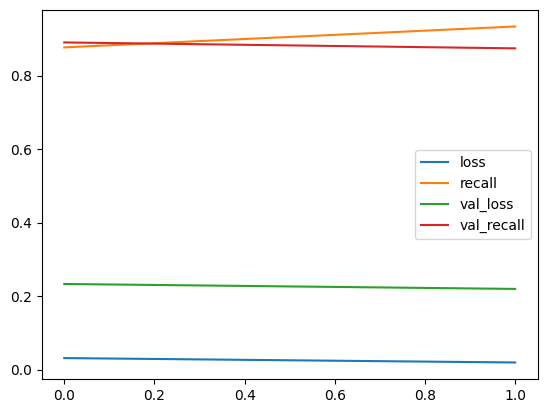

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_test, y_test)

761/761 [==============================] - 5s 6ms/step - loss: 0.2331 - recall: 0.8904


[0.23310065269470215, 0.890350878238678]

In [ ]:
model.evaluate(X_train, y_train)

6849/6849 [==============================] - 36s 5ms/step - loss: 0.2101 - recall: 0.9498


[0.21008999645709991, 0.9497887492179871]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

761/761 [==============================] - 4s 4ms/step
[[20961  2021]
 [  150  1218]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     22982
           1       0.38      0.89      0.53      1368

    accuracy                           0.91     24350
   macro avg       0.68      0.90      0.74     24350
weighted avg       0.96      0.91      0.93     24350



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

6849/6849 [==============================] - 29s 4ms/step
[[190167  16672]
 [   618  11690]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    206839
           1       0.41      0.95      0.57     12308

    accuracy                           0.92    219147
   macro avg       0.70      0.93      0.77    219147
weighted avg       0.96      0.92      0.94    219147



761/761 [==============================] - 4s 5ms/step


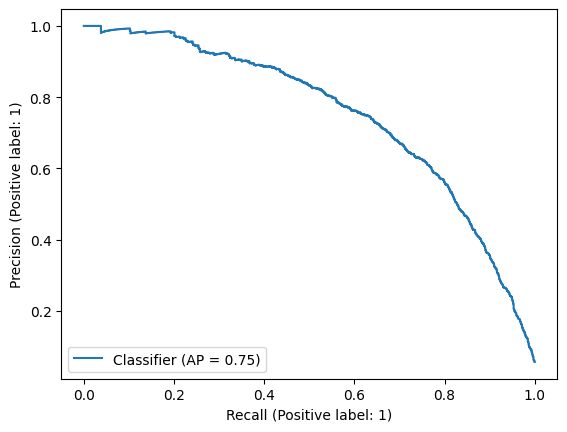

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7504701189135828

## Scores without sample_weight

Test set

                precision    recall  f1-score   support

           0       0.98      0.99      0.98     45965
           1       0.72      0.63      0.67      2735

    accuracy                           0.97     48700
   
 
 
 
 Train set 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    183856
           1       0.87      0.80      0.84     10941

    accuracy                           0.98    194797
   

## Model Saving

In [ ]:
#model.save('review_hepsiburada.h5')

##Loading Model

In [ ]:
#from tensorflow.keras.models import load_model
#model_review = load_model('/content/drive/MyDrive/review_hepsiburada.h5')

## Predicton

In [ ]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım."
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik."
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün.Teşekkürler '
review15 = 'telefon kesinlikle bu parayı hak etmiyor. yeni hiç bir özelliği yok. ancak küçük ekran sevenler için iyi bir telefon'
review16 = 'müthiş bir telefon ama bu parayı hak etmiyor'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16]

# 16 tane yorum için prediction alacağız.

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

# Öncelikle predict edeceğimiz textleri train datasında olduğu gibi datamızda en fazla kullanılan 15000 tokene göre  numeric versiona dönüştürüyoruz.
# train datasında en sık kullanılan ilk 15000 tokene göre dönüşümler yapıldığından ilk 15000 token dışında kalan tokenler predict aşamasında ignore edilir.

In [ ]:
np.array(tokens)

<ipython-input-121-7c9da339794c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(tokens)


array([list([1, 146, 70, 9, 10]), list([73, 4]),
       list([104, 2, 1032, 2333, 1466, 5, 19, 5, 1779, 11413]),
       list([4212, 11835]),
       list([553, 61, 82, 27, 1, 458, 33, 3, 4, 1032, 2333, 37]),
       list([46, 1096, 6419, 20, 50]),
       list([177, 735, 7728, 82, 263, 105, 326]),
       list([46, 5, 30, 177, 2, 1717, 1244, 4, 1723, 4600, 83]),
       list([74, 2, 28, 111, 19]), list([637, 20, 857]),
       list([395, 179, 1001, 511]), list([447, 147, 34]),
       list([7070, 318, 62, 1, 177, 375, 473, 286, 6559, 1412, 41, 9636, 774]),
       list([38, 40, 20, 108, 2, 161, 29, 150, 3, 5, 2855, 73, 2, 4, 9, 10, 1159, 2430, 104, 113, 2068, 11, 104, 1150, 175, 12730, 4, 16]),
       list([44, 43, 5, 1248, 492, 741, 135, 46, 2, 235, 21, 82, 116, 168, 1598, 8, 6, 2, 44]),
       list([584, 2, 44, 12, 5, 1248, 492, 741])], dtype=object)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens, padding="pre")
tokens_pad.shape

# tüm yorumları train datasında olduğu 61 tokene sabitliyoruz.

(16, 61)

In [ ]:
prob = model.predict(tokens_pad)
prob

1/1 [==============================] - 0s 21ms/step


array([[0.01501415],
       [0.0225437 ],
       [0.993324  ],
       [0.12396724],
       [0.97982204],
       [0.988313  ],
       [0.94777226],
       [0.9815578 ],
       [0.04858442],
       [0.9889157 ],
       [0.01519694],
       [0.80830854],
       [0.99131167],
       [0.21566276],
       [0.9705493 ],
       [0.589311  ]], dtype=float32)

In [ ]:
[i[0] for i in prob]

[0.015014148,
 0.022543702,
 0.993324,
 0.12396724,
 0.97982204,
 0.988313,
 0.94777226,
 0.9815578,
 0.04858442,
 0.9889157,
 0.01519694,
 0.80830854,
 0.99131167,
 0.21566276,
 0.9705493,
 0.589311]

In [ ]:
pred = (model.predict(tokens_pad) >0.5).astype("int")
pred

1/1 [==============================] - 0s 24ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
[i[0] for i in pred]

[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

In [ ]:
pd.set_option('display.max_colwidth', None) # None/-1 ile hücre genişliğini en uzun yoruma/satıra göre ayarlıyor.
my_dict = {"Review":reviews, "prob":[i[0] for i in prob], "classes":[i[0] for i in pred]}
pd.DataFrame(my_dict)

# DataFrame tüm featurların aynı boyutta olmasını istediğinden prob ve classes featurlarını 2 boyuttan tek boyuta düşürüyoruz. 
# Bu sayede tüm featuraler aynı boyutta olmuş oluyor.

Review  \
0                                                                                                                                                 çok beğendim herkese tavsiye ederim   
1                                                                                                                                                                          süper ürün   
2                                                                                                                büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım   
3                                                                                                                                                          kelimelerle tarif edilemez   
4                                                                                               tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten   
5                                                                                                                                                 hiç resimde gösterildiği gibi değil   
6                                                                                                                      kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım.   
7                                                                                                      hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum   
8                                                                                                                                                      tam bir fiyat performans ürünü   
9                                                                                                                                                             beklediğim gibi çıkmadı   
10                                                                                                                                                               on numara beş yıldız   
11                                                                                                                                                                 üründe sıkıntı var   
12                televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik.   
13  1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün.Teşekkürler    
14                                                               telefon kesinlikle bu parayı hak etmiyor. yeni hiç bir özelliği yok. ancak küçük ekran sevenler için iyi bir telefon   
15                                                                                                                                       müthiş bir telefon ama bu parayı hak etmiyor   

        prob  classes  
0   0.015945        0  
1   0.020698        0  
2   0.990473        1  
3   0.387328        0  
4   0.917060        1  
5   0.987781        1  
6   0.957950        1  
7   0.986676        1  
8   0.035599        0  
9   0.963472        1  
10  0.018658        0  
11  0.815634        1  
12  0.988828        1  
13  0.395895        0  
14  0.975465        1  
15  0.842785        1